In [44]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from os import listdir

In [48]:
sample, sr = librosa.load('../audio/4_voxforge/en/en0000-000.wav', sr=16000)

In [69]:
sample_mfcc3 = librosa.effects.feature.mfcc(sample, sr=sr, n_mfcc=3)
sample_mfcc10 = librosa.effects.feature.mfcc(sample, sr=sr, n_mfcc=10)

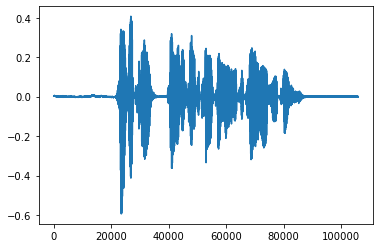

In [67]:
plt.plot(sample)

In [78]:
summed = np.apply_along_axis(sum, axis=0, arr=sample_mfcc)

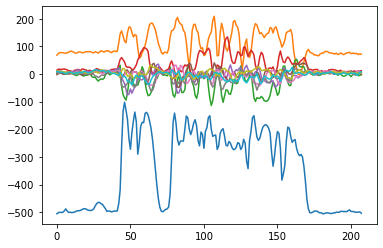

In [132]:
plt.plot(sample_mfcc10.T)
plt.show()

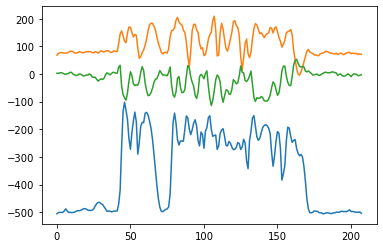

In [133]:
plt.plot(sample_mfcc3.T)
plt.show()

In [4]:
mfcc_files = ['../data/mfcc/5lang_10mfcc_022821/' + f for f in listdir('../data/mfcc/5lang_10mfcc_022821/') if 'mfcc.pkl' in f]
target_files = ['../data/target/' + f for f in listdir('../data/target/') if 'target.pkl' in f]

mfcc_files.sort()
target_files.sort()

In [5]:
mfcc_val = ['../data/mfcc/validation/' + f for f in listdir('../data/mfcc/validation/') if 'mfcc.pkl' in f]
target_val = ['../data/target/validation/' + f for f in listdir('../data/target/validation/') if 'target.pkl' in f] 

In [6]:
for f in mfcc_val:
    mfcc_files.append(f)
    
for f in target_val:
    target_files.append(f)

In [7]:
def reload(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [8]:
mfcc_reloaded = [reload(f) for f in mfcc_files]
target_reloaded = [reload(f) for f in target_files]

In [9]:
mfcc_reloaded

[array([[[-465.83395386, -449.87902832, -441.45144653, ...,
          -444.82241821, -445.34130859, -451.57141113],
         [  53.4822464 ,   60.17043304,   63.76741791, ...,
            60.47135162,   59.34136963,   56.18541718],
         [   6.78610706,   -1.45041537,   -2.38774014, ...,
            -0.48655933,   -1.61515641,    0.56300443],
         ...,
         [  18.87042809,   12.04356289,    5.82174969, ...,
            11.47303963,   13.99740696,   18.57733345],
         [  13.56516266,   10.28543663,    4.85598946, ...,
            11.59422016,   15.63195515,   18.83489609],
         [   9.11525726,    6.51106739,    7.30191898, ...,
            10.33063412,   11.62847519,   15.39929295]],
 
        [[-218.45549011, -218.13552856, -225.98561096, ...,
          -162.69042969, -157.40263367, -159.55726624],
         [  76.95304108,   78.82789612,   86.00902557, ...,
            81.04496002,   80.64465332,  101.44819641],
         [  -3.76968241,   -9.47787666,  -15.33216476, 

In [11]:
en_mfcc = mfcc_reloaded[0]

In [82]:
def plot_random(mfcc_arr, title, n_mfcc=10):
    a, b, c = np.random.randint(0, len(mfcc_arr), 3)
    fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16, 6))
    fig.suptitle(title)
    ax[0].plot(mfcc_arr[a, :n_mfcc].T)
    ax[1].plot(mfcc_arr[b, :n_mfcc].T)
    ax[2].plot(mfcc_arr[c, :n_mfcc].T)
    plt.show()

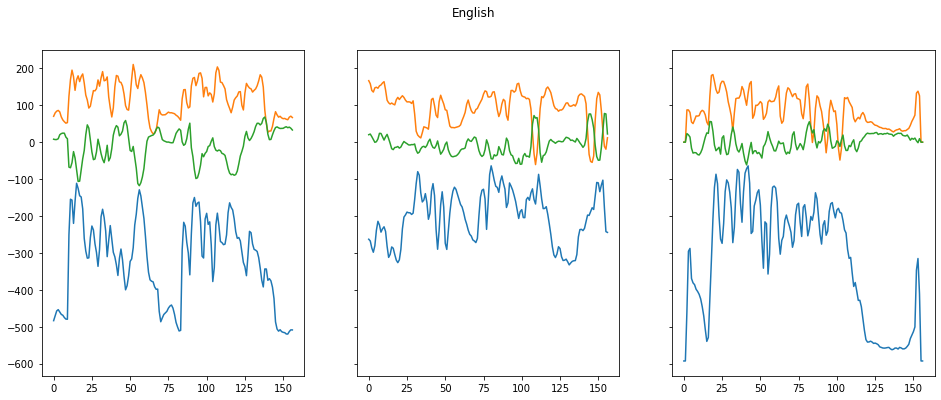

In [86]:
plot_random(mfcc_reloaded[0], 'English', 3)

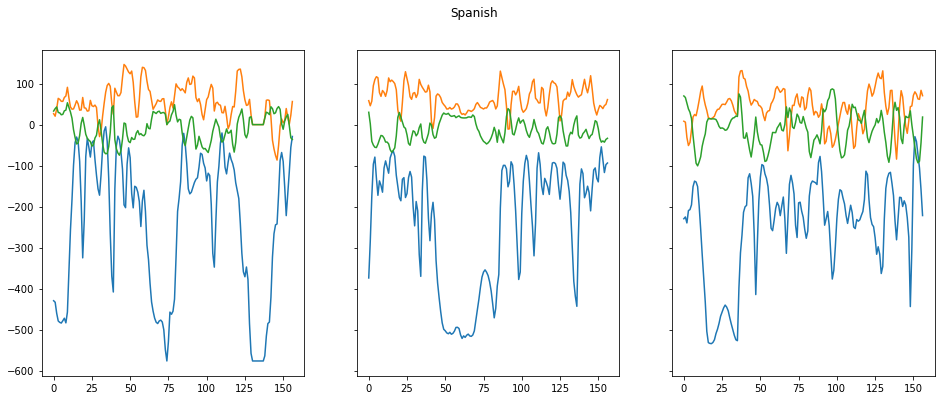

In [88]:
plot_random(mfcc_reloaded[1], 'Spanish', 3)

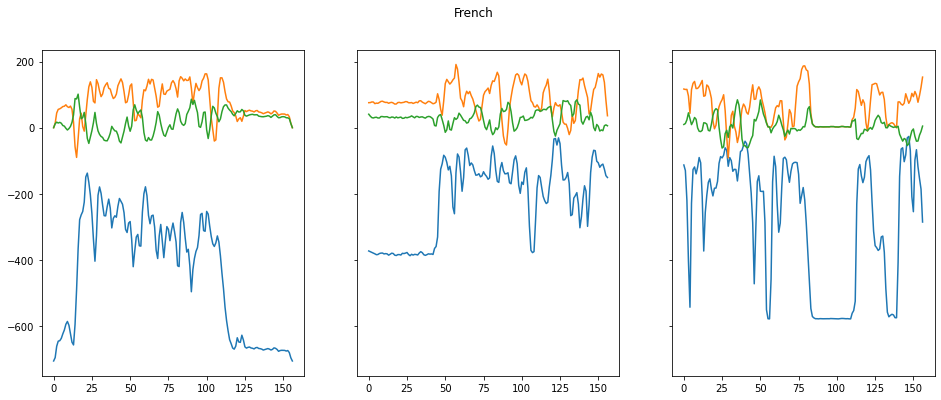

In [89]:
plot_random(mfcc_reloaded[2], 'French', 3)

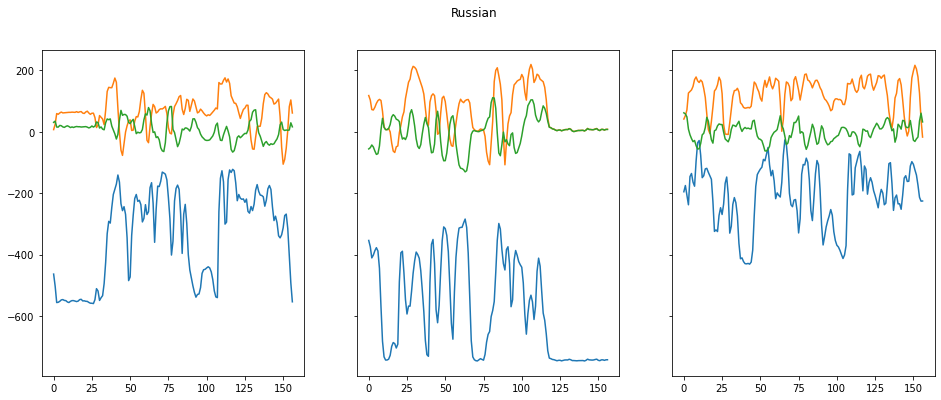

In [90]:
plot_random(mfcc_reloaded[3], 'Russian', 3)

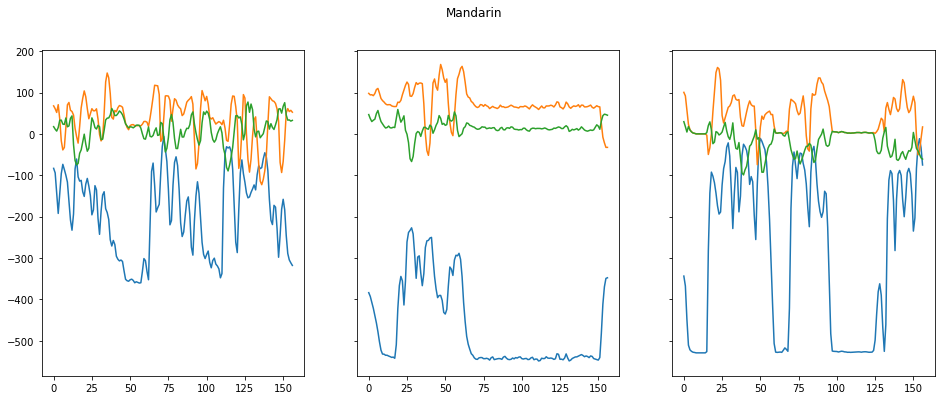

In [91]:
plot_random(mfcc_reloaded[4], 'Mandarin', 3)

In [124]:
def plot_avg(mfcc_arr, title=None, n_mfcc=10):
    avg_arr = np.apply_along_axis(np.mean, axis=0, arr=mfcc_arr)
    plt.plot(avg_arr.T[:, :n_mfcc])
    plt.ylim([-450, 150])
    plt.title(title)
    plt.show()

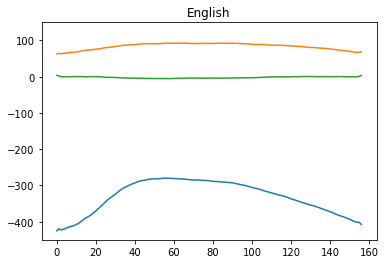

In [125]:
plot_avg(mfcc_reloaded[0], title='English', n_mfcc=3)

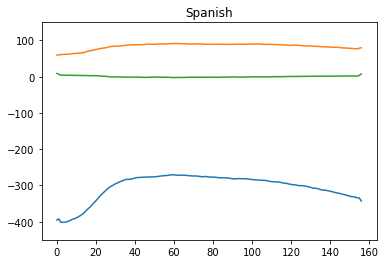

In [128]:
plot_avg(mfcc_reloaded[1], title='Spanish', n_mfcc=3)

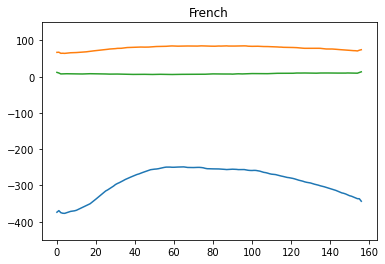

In [129]:
plot_avg(mfcc_reloaded[2], title='French', n_mfcc=3)

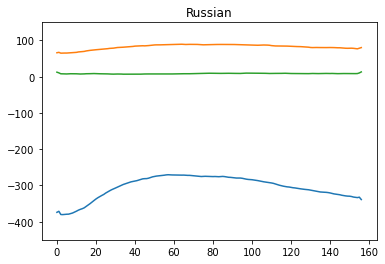

In [130]:
plot_avg(mfcc_reloaded[3], title='Russian', n_mfcc=3)

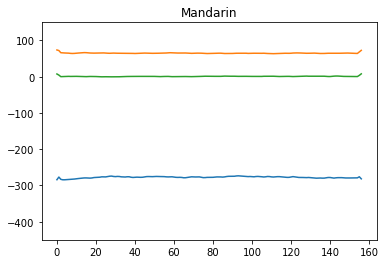

In [131]:
plot_avg(mfcc_reloaded[4], title='Mandarin', n_mfcc=3)